Python Notebook & Dataset: github.com/amberellaacademy/House_data

Medium profile: https://medium.com/@amberellaacademy

Slideshare: https://www.slideshare.net/amberellaacademy 

Email: amberellaacademy@gmail.com

# Assessing the Stability and Performance of Linear and Polynomial Regression Models for House Price Prediction

## Introduction
House prices prediction is a common application of regression analysis, providing valuable insights for real estate market analysis, investment decision-making, and policy formulation. This assignment aims to design and implement a comprehensive machine learning pipeline to predict house prices using linear and polynomial regression models, and to evaluate the stability and performance of these models.

## Objectives

1.	Train a Linear Regression Model:
o	Develop a linear regression model to predict house prices based on a given set of independent variables.
o	Analyze the beta coefficients and their significance.
2.	Train Polynomial Regression Models:
o	Develop three polynomial regression models with degrees 2, 3, and 4 to predict house prices.
o	Compare the complexity and fit of these models against the linear regression model.
3.	Evaluate Model Stability:
o	Assess the stability of each trained model by examining the variability of the inferred beta coefficients across different training data samples.
o	Implement techniques such as bootstrapping or cross-validation to evaluate coefficient sterfitting).
rfitting).


## Dataset used
House_data.csv

Downlaod link: https://github.com/amberellaacademy/House_data/blob/main/house_data.csv

In [44]:
## Importing necessary libraries

import pandas as pd
import numpy as np

df=pd.read_csv('house_data.csv')
df.head()

,Rooms,Age,Distance,Accessibility,Tax,DisadvantagedPosition,Crime,NitricOxides,PupilTeacher,Residential,NonRetail,Price
0,5.565,70.6,2.0635,24,666,17.16,8.79212,0.584,20.2,0.0,18.10,11.7
1,6.879,77.7,3.2721,8,307,9.93,0.62356,0.507,17.4,0.0,6.20,27.5
2,5.972,76.7,3.1025,4,304,9.97,0.34940,0.544,18.4,0.0,9.90,20.3
3,6.943,97.4,1.8773,5,403,4.59,1.22358,0.605,14.7,0.0,19.58,41.3
4,5.926,71.0,2.9084,24,666,18.13,15.57570,0.580,20.2,0.0,18.10,19.1


Rooms: The average number of rooms per dwelling.

Age: The proportion of owner-occupied units built before 1940.

Distance: The weighted distances to employment centers.

Accessibility: An index measuring the accessibility to highways.

Tax: The full-value property tax rate per $10,000.

DisadvantagedPosition: The percentage of the population with lower socioeconomic status.

Crime: The per capita crime rate.

NitricOxides: The concentration of nitric oxides in parts per 10 million.

PupilTeacher: The pupil-teacher ratio by town.

Residential: The proportion of residential land zoned for lots over 25,000 square feet.

NonRetail: The proportion of non-retail business acres per town.

Price: The prices of houses in dollars.

In [45]:
## Checking pre-processing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rooms                  399 non-null    float64
 1   Age                    399 non-null    float64
 2   Distance               399 non-null    float64
 3   Accessibility          399 non-null    int64  
 4   Tax                    399 non-null    int64  
 5   DisadvantagedPosition  399 non-null    float64
 6   Crime                  399 non-null    float64
 7   NitricOxides           399 non-null    float64
 8   PupilTeacher           399 non-null    float64
 9   Residential            399 non-null    float64
 10  NonRetail              399 non-null    float64
 11  Price                  399 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 37.5 KB


In [46]:
## Checking the size of the dataset
df.shape

(399, 12)

In [47]:
## Checking for null values
df.isnull().sum()

Rooms                    0
Age                      0
Distance                 0
Accessibility            0
Tax                      0
DisadvantagedPosition    0
Crime                    0
NitricOxides             0
PupilTeacher             0
Residential              0
NonRetail                0
Price                    0
dtype: int64

We conclude that there are no null values

In [48]:
## Importing libraries

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Splitting the dataset

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Objective 1: Training a linear regression model


In [51]:
# Train the linear regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_linear.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the model coefficients
print("\nintercept:", model_linear.intercept_)
coefficients = pd.DataFrame(model_linear.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 20.39156767613866
R-squared: 0.7489054841446292

intercept: 44.41694811634814
                       Coefficient
Rooms                     3.500579
Age                       0.002661
Distance                 -1.384729
Accessibility             0.265454
Tax                      -0.011218
DisadvantagedPosition    -0.642487
Crime                    -0.123515
NitricOxides            -16.602090
PupilTeacher             -1.092543
Residential               0.040321
NonRetail                 0.072883


**Intercept**
Value: 44.41694811634814

Explanation: The intercept is the expected mean value of the dependent variable (house prices) when all independent variables are zero. It provides a baseline value from which the effects of the independent variables are added or subtracted.

**Coefficients**
These values represent the weights assigned to each feature in the linear regression model. Each coefficient indicates the change in the dependent variable (house prices) for a one-unit change in the corresponding independent variable, holding all other variables constant.

## Objective 2: Training Polynomial regression of degrees 2, 3 & 4

### Degree 2 polynomial regression

In [52]:
# Polynomial features of degree 2
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_2 = poly_features_2.fit_transform(X_train)
X_test_poly_2 = poly_features_2.transform(X_test)

# Train the model
model_2 = LinearRegression()
model_2.fit(X_train_poly_2, y_train)

# Predict on the test set
y_pred_2 = model_2.predict(X_test_poly_2)

# Evaluate the model
mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)

print(f"Degree 2 Polynomial Regression:\nMean Squared Error: {mse_2}\nR-squared: {r2_2}")

# Get beta coefficients
beta_2 = model_2.coef_
print(f"Degree 2 Polynomial Regression Beta Coefficients: {beta_2}")


Degree 2 Polynomial Regression:
Mean Squared Error: 10.370133954721075
R-squared: 0.8723058567114002
Degree 2 Polynomial Regression Beta Coefficients: [ 3.71402710e+01  6.00354409e-02 -1.86057077e+01  1.34722825e+00
  5.17504555e-02 -1.25589775e+00 -2.70558809e+00  5.97694114e+01
  1.06786479e+01  7.16059485e-01 -1.18815357e-01 -7.79980544e-01
 -7.14687821e-03  1.18610203e+00  6.27066610e-02 -2.10486343e-02
 -1.82684503e-01  1.42135343e-01  2.86274632e+00 -9.37047715e-01
 -4.33597198e-02 -5.43065876e-03 -1.86640469e-04  1.68018640e-03
  1.31734854e-02 -4.40606785e-04 -5.05588275e-03 -3.37669570e-03
 -3.29370179e-01  5.80656981e-03  1.83114974e-04  1.32197955e-02
  5.47810022e-01 -5.77436099e-02 -3.48265562e-03  2.50787352e-01
 -1.49983200e-01  1.20232947e+01 -1.39090151e-01 -2.07155520e-02
  8.63283251e-02 -1.33935499e-01  6.54519956e-03 -2.44689603e-02
  7.61815384e-01 -1.66013545e+00 -9.41789459e-02 -6.15624006e-03
  3.24906052e-02 -7.04434110e-05 -1.20302793e-03 -5.47836833e-02
  1.

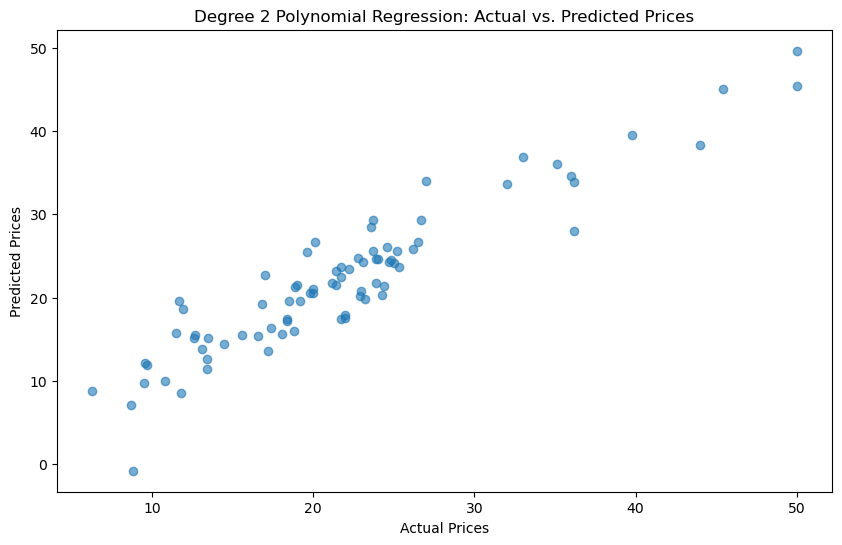

In [53]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_2, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Degree 2 Polynomial Regression: Actual vs. Predicted Prices')
plt.show()


## Degree 3 polynomial regression

In [54]:
# Polynomial features of degree 3
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly_3 = poly_features_3.fit_transform(X_train)
X_test_poly_3 = poly_features_3.transform(X_test)

# Train the model
model_3 = LinearRegression()
model_3.fit(X_train_poly_3, y_train)

# Predict on the test set
y_pred_3 = model_3.predict(X_test_poly_3)

# Evaluate the model
mse_3 = mean_squared_error(y_test, y_pred_3)
r2_3 = r2_score(y_test, y_pred_3)

print(f"Degree 3 Polynomial Regression:\nMean Squared Error: {mse_3}\nR-squared: {r2_3}")

# Get beta coefficients
beta_3 = model_3.coef_
print(f"Degree 3 Polynomial Regression Beta Coefficients: {beta_3}")



Degree 3 Polynomial Regression:
Mean Squared Error: 3134785.808546885
R-squared: -38599.63813673483
Degree 3 Polynomial Regression Beta Coefficients: [ 3.82283785e+01  2.71807490e+02 -1.06031523e+01  6.86678944e+01
 -1.62326090e+02  1.65541087e+02 -4.75215238e+01  3.40332134e+00
 -2.11099665e+01 -1.56632102e+02 -3.73286730e+01 -5.59871190e+02
 -1.98134333e+01  7.03765633e+00  9.33318893e+02  1.56303125e+01
  2.48978730e+01 -4.97362663e+02  5.48978894e+01  9.87954742e+01
 -1.81809667e+02 -5.44959317e+02  2.32279627e-01 -2.92178929e+01
 -5.73998590e+01  2.16285489e+00  1.38381866e+00  7.82310917e+01
  2.32071111e+02 -4.63566981e+01  8.26408759e+00  8.50277864e+00
 -4.81298517e+02 -2.44236800e+02  4.66604166e+01 -5.83550188e+01
 -4.97351462e+02  1.08252074e+01 -3.31164122e+02  4.65376215e+02
 -3.47704220e+01  4.27238294e+02 -2.49667616e+01  1.99188236e+02
  4.18013433e+01 -9.51836322e+00  2.41694286e+02  1.64321754e+01
 -6.17301295e+02  4.77654905e-01 -1.46813317e+01  3.63303505e+00
  1.7

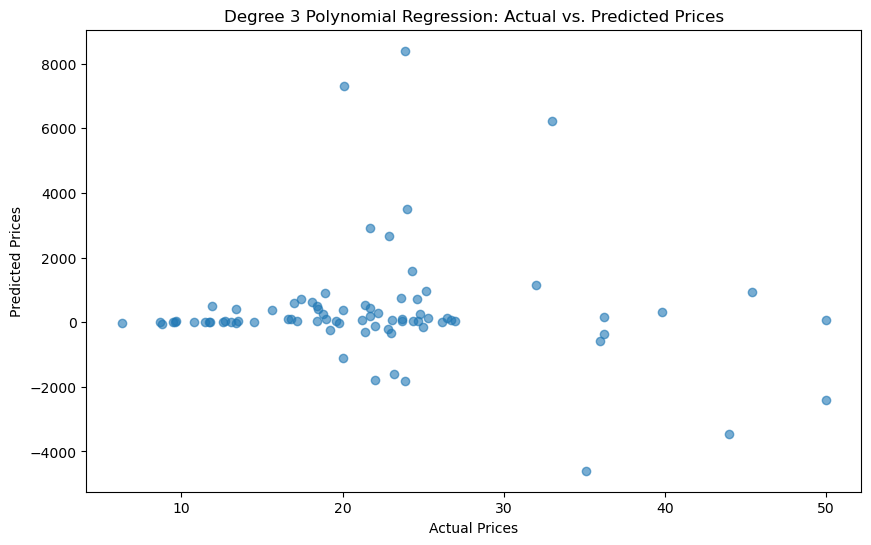

In [55]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_3, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Degree 3 Polynomial Regression: Actual vs. Predicted Prices')
plt.show()

## Degree 4 polynomial regression

In [56]:
# Polynomial features of degree 4
poly_features_4 = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly_4 = poly_features_4.fit_transform(X_train)
X_test_poly_4 = poly_features_4.transform(X_test)

# Train the model
model_4 = LinearRegression()
model_4.fit(X_train_poly_4, y_train)

# Predict on the test set
y_pred_4 = model_4.predict(X_test_poly_4)

# Evaluate the model
mse_4 = mean_squared_error(y_test, y_pred_4)
r2_4 = r2_score(y_test, y_pred_4)

print(f"Degree 4 Polynomial Regression:\nMean Squared Error: {mse_4}\nR-squared: {r2_4}")

# Get beta coefficients
beta_4 = model_4.coef_
print(f"Degree 4 Polynomial Regression Beta Coefficients: {beta_4}")

Degree 4 Polynomial Regression:
Mean Squared Error: 53563.082825252015
R-squared: -658.5567620563911
Degree 4 Polynomial Regression Beta Coefficients: [-2.21765331e-06  4.05392114e-06 -1.75057810e-06 ... -3.46271717e-03
  7.52415417e-04 -5.65728572e-03]


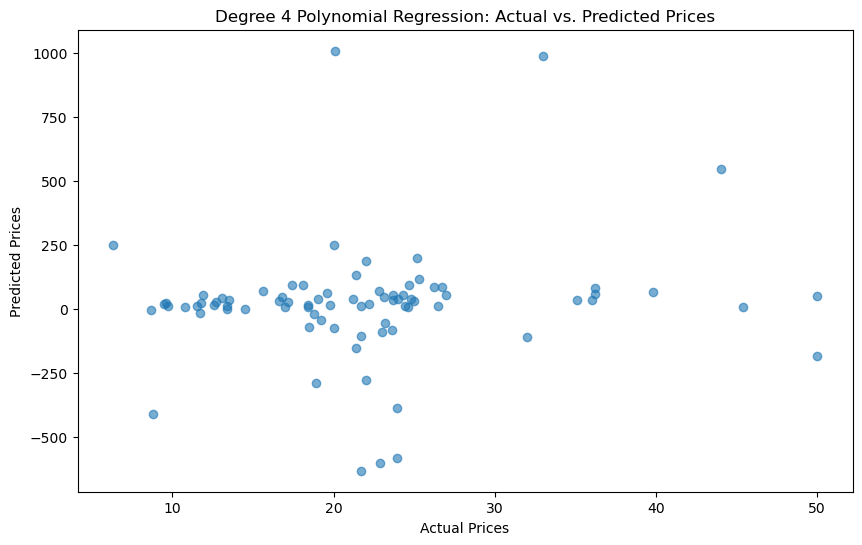

In [57]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_4, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Degree 4 Polynomial Regression: Actual vs. Predicted Prices')
plt.show()

## Objective 3: Stability check using bootstraping

### Linear regression

In [58]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Define the number of bootstrap iterations
n_iterations = 1000

# Store coefficients from each bootstrap sample
bootstrap_coeffs_linear = np.zeros((n_iterations, X.shape[1]))

for i in range(n_iterations):
    # Resample the data
    X_train_boot, y_train_boot = resample(X_train, y_train, random_state=i)
    
    # Fit the model
    model_boot = LinearRegression()
    model_boot.fit(X_train_boot, y_train_boot)
    
    # Store the coefficients
    bootstrap_coeffs_linear[i, :] = model_boot.coef_

# Compute mean and standard deviation of coefficients
mean_coeff_bootstrap_linear = np.mean(bootstrap_coeffs_linear, axis=0)
std_coeff_bootstrap_linear = np.std(bootstrap_coeffs_linear, axis=0)

print("Bootstrapping for Linear Regression Beta Coefficients:")
print(f"Mean of Coefficients:\n{mean_coeff_bootstrap_linear}")
print(f"Standard Deviation of Coefficients:\n{std_coeff_bootstrap_linear}")

# Analyze coefficient stability
mean_std_coeff_linear = np.mean(std_coeff_bootstrap_linear)
if mean_std_coeff_linear > 0.01:
    print("The coefficients have a high variance across bootstrap samples, indicating potential instability.")
else:
    print("The coefficients have a low variance across bootstrap samples, suggesting a more stable model.")


Bootstrapping for Linear Regression Beta Coefficients:
Mean of Coefficients:
[ 3.57794138e+00  1.38967098e-03 -1.38426931e+00  2.57047877e-01
 -1.12452797e-02 -6.32198346e-01 -1.20333836e-01 -1.63538901e+01
 -1.08576921e+00  3.99924751e-02  7.03569653e-02]
Standard Deviation of Coefficients:
[1.07714508e+00 2.16126388e-02 2.62959373e-01 7.93226298e-02
 3.30911973e-03 1.34816674e-01 4.16994499e-02 4.99391337e+00
 1.58501238e-01 1.72486035e-02 7.36538667e-02]
The coefficients have a high variance across bootstrap samples, indicating potential instability.


### Polynomial regression of degree 2

In [59]:
# Initialize PolynomialFeatures for Degree 2 Polynomial Regression
poly_features_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_features_2.fit_transform(X)

# Splitting the polynomial data
X_train_poly_2, X_test_poly_2, y_train, y_test = train_test_split(X_poly_2, y, test_size=0.2, random_state=42)

# Define the number of bootstrap iterations
n_iterations = 1000

# Store coefficients from each bootstrap sample
bootstrap_coeffs_poly_2 = np.zeros((n_iterations, X_train_poly_2.shape[1]))

for i in range(n_iterations):
    # Resample the data
    X_train_boot, y_train_boot = resample(X_train_poly_2, y_train, random_state=i)
    
    # Fit the model
    model_boot_poly_2 = LinearRegression()
    model_boot_poly_2.fit(X_train_boot, y_train_boot)
    
    # Store the coefficients
    bootstrap_coeffs_poly_2[i, :] = model_boot_poly_2.coef_

# Compute mean and standard deviation of coefficients
mean_coeff_bootstrap_poly_2 = np.mean(bootstrap_coeffs_poly_2, axis=0)
std_coeff_bootstrap_poly_2 = np.std(bootstrap_coeffs_poly_2, axis=0)

print("Bootstrapping for Degree 2 Polynomial Regression Beta Coefficients:")
print(f"Mean of Coefficients:\n{mean_coeff_bootstrap_poly_2}")
print(f"Standard Deviation of Coefficients:\n{std_coeff_bootstrap_poly_2}")

# Analyze coefficient stability
mean_std_coeff_poly_2 = np.mean(std_coeff_bootstrap_poly_2)
if mean_std_coeff_poly_2 > 0.01:
    print("The coefficients have a high variance across bootstrap samples, indicating potential instability.")
else:
    print("The coefficients have a low variance across bootstrap samples, suggesting a more stable model.")


Bootstrapping for Degree 2 Polynomial Regression Beta Coefficients:
Mean of Coefficients:
[ 5.42777414e+07  2.75952352e+01  7.53313845e-02 -2.04076148e+01
  1.64028303e+00  4.90825967e-02 -1.43337698e+00 -6.66465613e-01
 -5.94140336e+00  8.97186970e+00  7.86355170e-01 -1.06847621e-01
 -3.20507914e-01 -1.69106023e-02  1.18451730e+00  7.31053357e-03
 -1.78244894e-02 -1.01691616e-01  1.30971234e-01  7.18232325e+00
 -8.80488088e-01 -5.03084580e-02 -6.32562981e-02 -1.06265277e-04
  2.50007667e-03  1.45854638e-02 -4.96431778e-04 -6.92427529e-03
 -3.43798350e-03 -3.02311828e-01  8.57081371e-03  2.50540310e-04
  1.25939374e-02  6.28800602e-01 -3.86209501e-02 -4.20832808e-03
  2.40642949e-01 -1.70575745e-01  1.53088690e+01 -1.51965994e-01
 -2.30106993e-02  8.36062606e-02 -1.63304604e-01  7.21092250e-03
 -2.37547665e-02  1.00749748e+00 -9.51461250e-01 -1.14912193e-01
 -7.78084629e-03  4.26733558e-02 -5.18626093e-05 -1.22616267e-03
 -7.40154140e-02  8.01275225e-02  2.90803604e-03  5.38069204e-04


### Polynomial regression of degree 3

In [60]:
# Initialize PolynomialFeatures for Degree 3 Polynomial Regression
poly_features_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_features_3.fit_transform(X)

# Splitting the polynomial data
X_train_poly_3, X_test_poly_3, y_train, y_test = train_test_split(X_poly_3, y, test_size=0.2, random_state=42)

# Define the number of bootstrap iterations
n_iterations = 1000

# Store coefficients from each bootstrap sample
bootstrap_coeffs_poly_3 = np.zeros((n_iterations, X_train_poly_3.shape[1]))

for i in range(n_iterations):
    # Resample the data
    X_train_boot, y_train_boot = resample(X_train_poly_3, y_train, random_state=i)
    
    # Fit the model
    model_boot_poly_3 = LinearRegression()
    model_boot_poly_3.fit(X_train_boot, y_train_boot)
    
    # Store the coefficients
    bootstrap_coeffs_poly_3[i, :] = model_boot_poly_3.coef_

# Compute mean and standard deviation of coefficients
mean_coeff_bootstrap_poly_3 = np.mean(bootstrap_coeffs_poly_3, axis=0)
std_coeff_bootstrap_poly_3 = np.std(bootstrap_coeffs_poly_3, axis=0)

print("Bootstrapping for Degree 3 Polynomial Regression Beta Coefficients:")
print(f"Mean of Coefficients:\n{mean_coeff_bootstrap_poly_3}")
print(f"Standard Deviation of Coefficients:\n{std_coeff_bootstrap_poly_3}")

# Analyze coefficient stability
mean_std_coeff_poly_3 = np.mean(std_coeff_bootstrap_poly_3)
if mean_std_coeff_poly_3 > 0.01:
    print("The coefficients have a high variance across bootstrap samples, indicating potential instability.")
else:
    print("The coefficients have a low variance across bootstrap samples, suggesting a more stable model.")


Bootstrapping for Degree 3 Polynomial Regression Beta Coefficients:
Mean of Coefficients:
[ 1.11656310e-04  1.83861403e-05  2.73601519e-02  1.29458697e-03
  8.00565842e-05  8.48964011e-03  1.10928532e-02  6.90238799e-04
 -1.50216710e-04 -2.11060999e-03  7.87729047e-03  1.43731799e-03
  1.13104990e-02  6.78202667e-03 -1.71151157e-03 -8.53763547e-03
  5.81363067e-02  7.22664456e-02 -8.06216764e-03 -1.76626076e-03
 -7.78335960e-03  3.97806625e-02  9.05022033e-03 -7.14559333e-02
  2.26679479e-01 -2.15676569e-02  1.25105474e-03  2.17696814e-01
  3.90630829e-02 -4.16207426e-03  2.66943027e-01 -5.73167354e-02
 -7.85627879e-02  2.00982995e-02 -8.58620600e-03  8.45561780e-02
  1.26549529e-01 -1.73337797e-02 -6.65458949e-04  6.51387090e-03
 -3.47666054e-03  2.01180452e-02  1.38310642e-03 -3.27687342e-02
  2.08023535e-03  1.93218871e-03  1.13442001e-03 -3.11285717e-03
  3.95554694e-03  4.26061815e-03 -7.20135178e-04 -1.33015365e-02
  1.14662783e-01 -8.18869471e-03 -9.72054862e-02  3.92515936e-03


### Polynomial regression of degree 4

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
import numpy as np
from sklearn.model_selection import train_test_split

# Polynomial Features for Degree 4 Polynomial Regression
poly_features_4 = PolynomialFeatures(degree=4)
X_poly_4 = poly_features_4.fit_transform(X)

# Splitting the polynomial data
X_train_poly_4, X_test_poly_4, y_train, y_test = train_test_split(X_poly_4, y, test_size=0.2, random_state=42)

# Define the number of bootstrap iterations
n_iterations = 1000

# Store coefficients from each bootstrap sample
bootstrap_coeffs_poly_4 = np.zeros((n_iterations, X_train_poly_4.shape[1]))

for i in range(n_iterations):
    # Resample the data
    X_train_boot, y_train_boot = resample(X_train_poly_4, y_train, random_state=i)
    
    # Fit the model
    model_boot_poly_4 = LinearRegression()
    model_boot_poly_4.fit(X_train_boot, y_train_boot)
    
    # Store the coefficients
    bootstrap_coeffs_poly_4[i, :] = model_boot_poly_4.coef_

# Compute mean and standard deviation of coefficients
mean_coeff_bootstrap_poly_4 = np.mean(bootstrap_coeffs_poly_4, axis=0)
std_coeff_bootstrap_poly_4 = np.std(bootstrap_coeffs_poly_4, axis=0)

print("Bootstrapping for Degree 4 Polynomial Regression Beta Coefficients:")
print(f"Mean of Coefficients:\n{mean_coeff_bootstrap_poly_4}")
print(f"Standard Deviation of Coefficients:\n{std_coeff_bootstrap_poly_4}")

# Analyze coefficient stability
mean_std_coeff_poly_4 = np.mean(std_coeff_bootstrap_poly_4)
if mean_std_coeff_poly_4 > 0.01:
    print("The coefficients have a high variance across bootstrap samples, indicating potential instability.")
else:
    print("The coefficients have a low variance across bootstrap samples, suggesting a more stable model.")


Bootstrapping for Degree 4 Polynomial Regression Beta Coefficients:
Mean of Coefficients:
[-2.65295310e-09  7.85417353e-09  6.72452485e-08 ...  4.08416251e-06
  2.34729749e-07 -5.04912898e-06]
Standard Deviation of Coefficients:
[8.62716989e-08 2.11154371e-08 1.11075275e-07 ... 2.62048581e-05
 1.32530932e-05 5.21492205e-05]
The coefficients have a low variance across bootstrap samples, suggesting a more stable model.


## Objective 3: Stability check using cross-validation

### Linear regression

In [62]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
cv_scores_linear = cross_val_score(model_linear, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression Mean Cross-Validation Score: {-np.mean(cv_scores_linear)}")
print(f"Linear Regression Standard Deviation of Cross-Validation Scores: {np.std(cv_scores_linear)}")


Linear Regression Mean Cross-Validation Score: 27.074861730684404
Linear Regression Standard Deviation of Cross-Validation Scores: 8.104499428289772


### Polynomial regression of degree 2

In [63]:
# Cross-validation for Degree 2 Polynomial Regression
cv_scores_poly_2 = cross_val_score(LinearRegression(), X_poly_2, y, cv=5, scoring='neg_mean_squared_error')
print(f"Degree 2 Polynomial Regression Mean Cross-Validation Score: {-np.mean(cv_scores_poly_2)}")
print(f"Degree 2 Polynomial Regression Standard Deviation of Cross-Validation Scores: {np.std(cv_scores_poly_2)}")


Degree 2 Polynomial Regression Mean Cross-Validation Score: 115.79739054043611
Degree 2 Polynomial Regression Standard Deviation of Cross-Validation Scores: 91.70473668156518


### Polynomial regression of degree 3

In [64]:
# Cross-validation for Degree 3 Polynomial Regression
cv_scores_poly_3 = cross_val_score(LinearRegression(), X_poly_3, y, cv=5, scoring='neg_mean_squared_error')
print(f"Degree 3 Polynomial Regression Mean Cross-Validation Score: {-np.mean(cv_scores_poly_3)}")
print(f"Degree 3 Polynomial Regression Standard Deviation of Cross-Validation Scores: {np.std(cv_scores_poly_3)}")


Degree 3 Polynomial Regression Mean Cross-Validation Score: 15544211.154158777
Degree 3 Polynomial Regression Standard Deviation of Cross-Validation Scores: 12125689.796849558


### Polynomial regression of degree 4

In [65]:
# Perform cross-validation for Degree 4 Polynomial Regression
cv_scores_poly_4 = cross_val_score(LinearRegression(), X_poly_4, y, cv=5, scoring='neg_mean_squared_error')

# Calculate Mean and Standard Deviation of Cross-Validation Scores
mean_cv_score_poly_4 = -np.mean(cv_scores_poly_4)  # Negate the score to get the mean MSE
std_cv_score_poly_4 = np.std(cv_scores_poly_4)  # Standard deviation of the MSE scores

print(f"Degree 4 Polynomial Regression Mean Cross-Validation Score: {mean_cv_score_poly_4}")
print(f"Degree 4 Polynomial Regression Standard Deviation of Cross-Validation Scores: {std_cv_score_poly_4}")


Degree 4 Polynomial Regression Mean Cross-Validation Score: 936423.745849297
Degree 4 Polynomial Regression Standard Deviation of Cross-Validation Scores: 1520304.0788731175


# Interpretation of results

**High Standard Deviation**: If the standard deviation were much higher, it would indicate significant instability in the model's performance across different data subsets, potentially suggesting that the model is sensitive to the specific training data used.

**Moderate Standard Deviation**: A standard deviation of 8.1045 is moderate, suggesting that while there is some fluctuation in the model's performance, it is not excessively unstable.

**High Variance (> 0.01)**: Indicates potential instability and suggests that the model may overfit the data.

**Low Variance (≤ 0.01)**: Suggests that the coefficients are stable, which indicates a more robust model.

From the above observations, it is clear that polynomial regression of degree 2 and linear regression are good models for the given dataset. If we combine the results with the values of R-square, we conclude that polynomial regression of degree 2 is the msot stable model for the given dataset.
                                                                                                                    